<a href="https://colab.research.google.com/github/aryanwalia2003/ann_handwritten_prediction/blob/main/handwritten_digit_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import pickle
import numpy as np
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D
from keras import Sequential

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

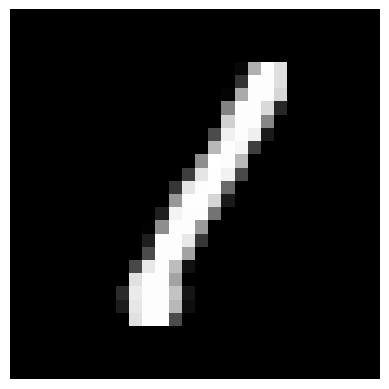

In [ ]:
import matplotlib.pyplot as plt

image_index = 59

plt.imshow(X_train[image_index], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
y_train[59]

1

In [ ]:
X_train=X_train/255

In [ ]:
X_test=X_test/255

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))

In [ ]:
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['acc'])

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs=100, batch_size=16,callbacks=callback)

Epoch 1/100
3000/3000 [==============================] - 12s 4ms/step - loss: 0.2654 - acc: 0.9198 - val_loss: 0.1487 - val_acc: 0.9566
Epoch 2/100
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1163 - acc: 0.9641 - val_loss: 0.1220 - val_acc: 0.9632
Epoch 3/100
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0818 - acc: 0.9748 - val_loss: 0.1066 - val_acc: 0.9690
Epoch 4/100
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0624 - acc: 0.9805 - val_loss: 0.1077 - val_acc: 0.9707
Epoch 5/100
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0509 - acc: 0.9839 - val_loss: 0.1085 - val_acc: 0.9709
Epoch 6/100
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0433 - acc: 0.9866 - val_loss: 0.1025 - val_acc: 0.9740
Epoch 7/100
3000/3000 [==============================] - 11s 4ms/step - loss: 0.0376 - acc: 0.9876 - val_loss: 0.1084 - val_acc: 0.9728
Epoch 8/100
3000/3000 [==========================

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0997 - acc: 0.9737
Test Accuracy = 0.9736999869346619


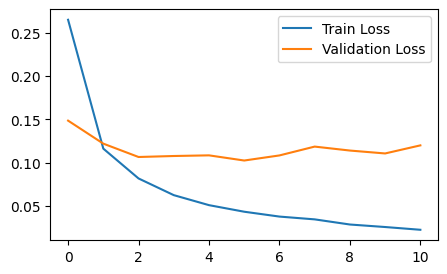

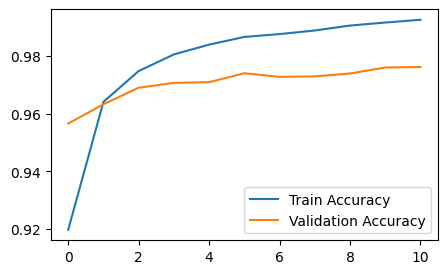

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
print("Validation Accuracy : ",np.mean(history.history['val_acc']))
print("Training Accuracy : ",np.mean(history.history['acc']))

Validation Accuracy :  0.9705605994571339
Training Accuracy :  0.9782405224713412


In [ ]:
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)

print(classification_report(y_pred, y_test))

313/313 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       992
           1       0.99      0.99      0.99      1144
           2       0.98      0.98      0.98      1036
           3       0.97      0.96      0.97      1023
           4       0.96      0.99      0.97       946
           5       0.96      0.97      0.97       882
           6       0.97      0.99      0.98       943
           7       0.97      0.98      0.98      1013
           8       0.95      0.98      0.96       952
           9       0.99      0.93      0.96      1069

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



Text(0.5, 1.0, 'Confusion Matrix')

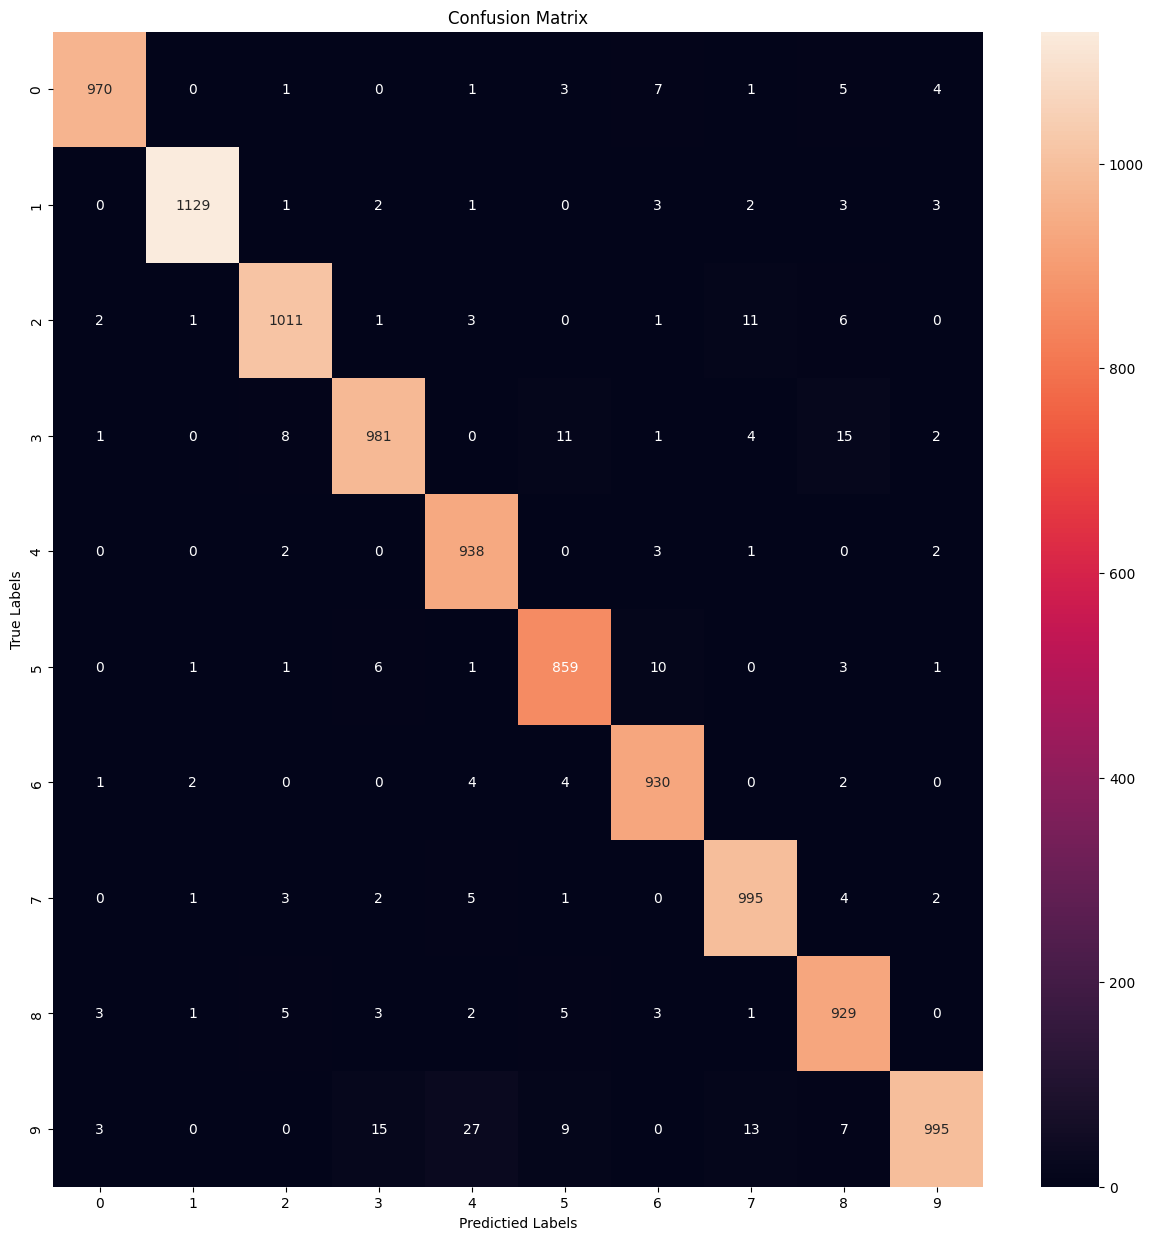

In [ ]:
cmatrix = confusion_matrix(y_pred, y_test)
fig, ax = plt.subplots(figsize=(15, 15))
sn.heatmap(cmatrix,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predictied Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix')

In [ ]:
# model.save("handwritten_digit_prediction.h5")

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9726

In [ ]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 37ms/step


array([4])

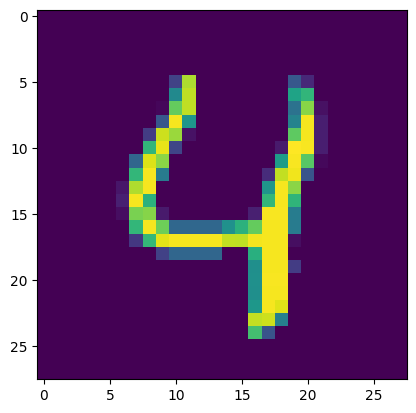

In [ ]:
plt.imshow(X_test[4])

In [ ]:
```````````````````from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(10, activation="softmax"))


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 32)                4128      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-tr

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['acc'])

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


callback=EarlyStopping(
    monitor="val_acc",
    min_delta=0.0001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs=100, batch_size=16,callbacks=callback)

Epoch 1/100
3000/3000 [==============================] - 11s 3ms/step - loss: 0.3877 - acc: 0.8865 - val_loss: 0.1477 - val_acc: 0.9553
Epoch 2/100
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1901 - acc: 0.9445 - val_loss: 0.1148 - val_acc: 0.9657
Epoch 3/100
3000/3000 [==============================] - 11s 4ms/step - loss: 0.1499 - acc: 0.9552 - val_loss: 0.1024 - val_acc: 0.9715
Epoch 4/100
3000/3000 [==============================] - 9s 3ms/step - loss: 0.1320 - acc: 0.9614 - val_loss: 0.1003 - val_acc: 0.9716
Epoch 5/100
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1148 - acc: 0.9664 - val_loss: 0.0929 - val_acc: 0.9739
Epoch 6/100
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1040 - acc: 0.9691 - val_loss: 0.0921 - val_acc: 0.9747
Epoch 7/100
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0978 - acc: 0.9707 - val_loss: 0.0951 - val_acc: 0.9731
Epoch 8/100
3000/3000 [==========================

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0973 - acc: 0.9770
Test Accuracy = 0.9769999980926514


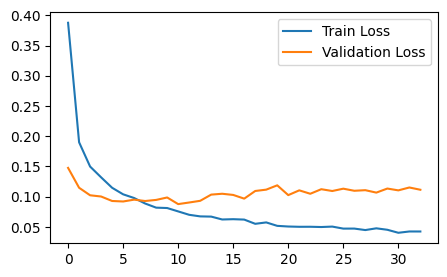

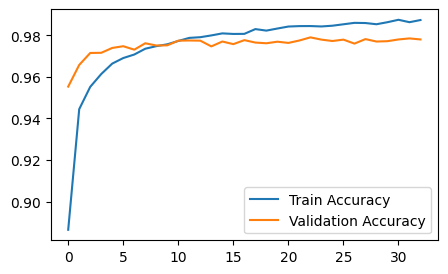

In [ ]:
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
print("Validation Accuracy : ",np.mean(history.history['val_acc']))
print("Training Accuracy : ",np.mean(history.history['acc']))

Validation Accuracy :  0.9753964615590645
Training Accuracy :  0.975615533915433
